In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Preprocessing

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

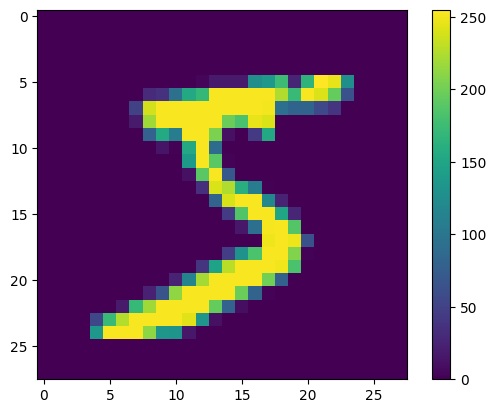

In [4]:
plt.imshow(X_train[0])
plt.colorbar()

In [5]:
y_train[0]

5

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
X_train.min(), X_train.max()

(0, 255)

In [8]:
y_train.max(),y_train.min()

(9, 0)

In [9]:
X_train = X_train/ 255.0

In [10]:
X_test = X_test/ 255.0

In [11]:
X_train.min(), X_train.max()

(0.0, 1.0)

#### Reshaping images

In [12]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [13]:
X_test.shape, X_train.shape

((10000, 28, 28, 1), (60000, 28, 28, 1))

In [14]:
input_shape = X_train[0].shape
print(input_shape)

(28, 28, 1)


## Building a model

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape =(28,28,1)),
    tf.keras.layers.Conv2D(filters = 32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Conv2D(filters = 64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units =128, activation = 'relu'),
    tf.keras.layers.Dense(units =10, activation = 'softmax')
])

NameError: name 'tf' is not defined

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [1]:
model.compile(optimizer = 'adam',loss ='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'] )

NameError: name 'model' is not defined

In [18]:
history = model.fit(X_train, y_train, batch_size =128 , epochs =10, validation_data=(X_test, y_test) )

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - loss: 0.4005 - sparse_categorical_accuracy: 0.8765 - val_loss: 0.0493 - val_sparse_categorical_accuracy: 0.9844
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - loss: 0.0544 - sparse_categorical_accuracy: 0.9829 - val_loss: 0.0369 - val_sparse_categorical_accuracy: 0.9879
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - loss: 0.0341 - sparse_categorical_accuracy: 0.9895 - val_loss: 0.0328 - val_sparse_categorical_accuracy: 0.9891
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - loss: 0.0268 - sparse_categorical_accuracy: 0.9919 - val_loss: 0.0337 - val_sparse_categorical_accuracy: 0.9880
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - loss: 0.0207 - sparse_categorical_accuracy: 0.9934 - val_loss: 0.0308 - val_sparse_categorical_accuracy: 0.9894
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - loss: 0.0174 - sparse_categorical_accuracy: 0.9947 - val_loss: 0.0288 - val_sparse_categorical_accuracy:

In [19]:
y_pred = np.argmax(model.predict(X_test), axis =-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [20]:
y_pred[0], y_test[0]

(7, 7)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [22]:
accuracy_score(y_test, y_pred)

0.9905

In [23]:
confusion_matrix(y_test, y_pred)

array([[ 977,    0,    0,    1,    0,    0,    1,    0,    0,    1],
       [   0, 1130,    1,    1,    0,    1,    2,    0,    0,    0],
       [   0,    0, 1025,    0,    0,    0,    1,    3,    3,    0],
       [   0,    0,    5,  995,    0,    7,    0,    1,    2,    0],
       [   0,    0,    0,    0,  976,    0,    4,    0,    0,    2],
       [   2,    0,    0,    3,    0,  882,    4,    0,    1,    0],
       [   4,    2,    0,    0,    3,    1,  946,    0,    2,    0],
       [   0,    1,    5,    1,    0,    0,    0, 1020,    1,    0],
       [   0,    0,    1,    0,    0,    0,    0,    1,  971,    1],
       [   0,    1,    1,    0,   10,    6,    0,    3,    5,  983]],
      dtype=int64)

## Learning Curve

In [28]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
  plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

# Example usage
# learning_curve(history, 10)




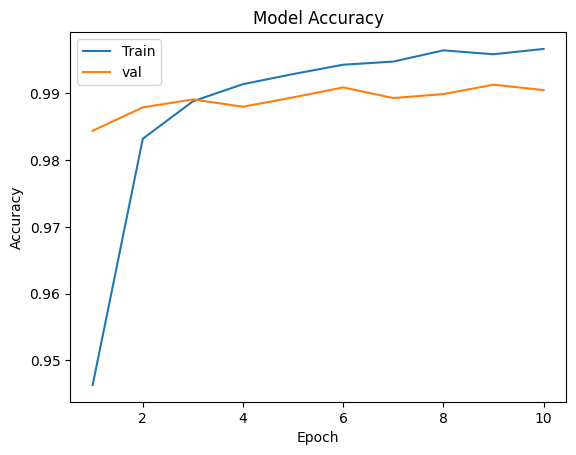

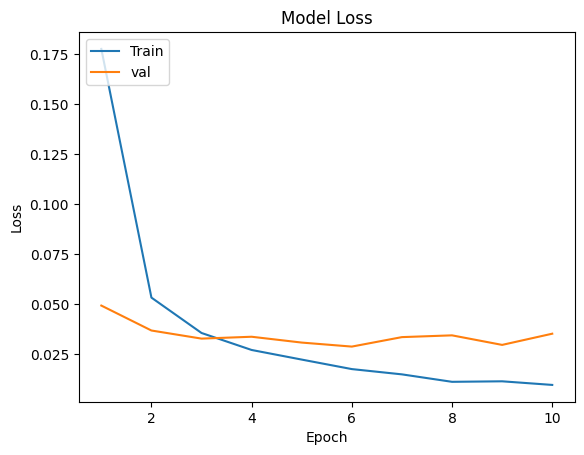

In [29]:
learning_curve(history, 10)